# Rapid eye movements analysis

## Introductory notes:
This notebook presents REMs detection functionality.

Recommended reading:
1. [YASA: FAQ](https://raphaelvallat.com/yasa/build/html/faq.html#event-detection)
2. [YASA: Rapid Eye Movements (REMs) detection](https://github.com/raphaelvallat/yasa/blob/master/notebooks/07_REMs_detection.ipynb)
3. [YASA: REMResults class](https://raphaelvallat.com/yasa/build/html/generated/yasa.REMResults.html#yasa.REMResults)

## Import module

In [ ]:
from sleepeegpy.pipeline import RapidEyeMovementsPipe
from os import makedirs,path

## REMs detection

If you wish to change the path for output_dir ot input dir, change it below.
If no such folders, they will be created automatically.

In [ ]:
output_dir  = "output_folder" # Output path and name can be changed here
input_dir = "input_files" # input files dir can be changed here
makedirs(input_dir, exist_ok=True)
makedirs(output_dir, exist_ok=True)

#### Add required files and data
* Put all your files in the input folder.
* Modify your eeg file name below. The file can be any format supported by the mne.read_raw() function.
* Modify your hypnogram file name below
* Make sure the hypno_freq is the right frequency.
* For more information about the supported formats, see [mne documentation](https://mne.tools/stable/generated/mne.io.Raw.html)

In [ ]:
eeg_file_name= "resampled_raw.fif" #None # add your eeg_path here
hypnogram_filename = "staging.txt" # Hypnogram filename can be changed here (file must be in the input dir)
hypno_freq = 1

In [ ]:
path_to_eeg = path.join(input_dir,eeg_file_name)
hypnogram_path = path.join(input_dir,hypnogram_filename)

assert path.isfile(path_to_eeg) and path.isfile(hypnogram_path), f"{path_to_eeg} or {hypnogram_path} not exist"
rems_pipe = RapidEyeMovementsPipe(
    path_to_eeg=path_to_eeg,
    output_dir=output_dir,
    path_to_hypno=hypnogram_path,
    hypno_freq=hypno_freq,
)

Please refer to the YASA's [documentation](https://raphaelvallat.com/yasa/build/html/generated/yasa.rem_detect.html) for details about the arguments.

In [ ]:
rems_pipe.detect(
    reference="average",
    loc_chname="E46",
    roc_chname="E238",
    include=4,
    freq_rem=(0.5, 5),
    duration=(0.3, 1.2),
    amplitude=(50, 325),
    remove_outliers=False,
    save=True,
)

Please refer to the YASA's [documentation](https://raphaelvallat.com/yasa/build/html/generated/yasa.REMResults.html#yasa.REMResults.summary) for details about the arguments.

In [ ]:
rems_pipe.results.summary(
    grp_stage=False, 
    mask=None, 
    aggfunc='mean', 
    sort=True
)

Start       Peak        End  Duration  LOCAbsValPeak  ROCAbsValPeak  \
0   11050.544  11050.904  11051.096     0.552      95.514371      30.423478   
1   11094.860  11095.436  11095.712     0.852     112.146842      40.051066   
2   11095.964  11096.508  11097.108     1.144      83.861166      33.723120   
3   11482.476  11482.772  11483.136     0.660      59.031067      45.284152   
4   15971.100  15971.276  15971.560     0.460      61.745377      60.780729   
..        ...        ...        ...       ...            ...            ...   
80  23049.292  23049.600  23049.904     0.612     104.243540      28.876271   
81  23056.604  23057.204  23057.520     0.916      77.727534      32.451615   
82  23075.852  23076.452  23076.592     0.740     116.082740      33.233345   
83  23076.672  23077.272  23077.544     0.872     129.179400      56.446968   
84  23077.856  23078.224  23078.712     0.856     112.166788      44.556604   

    LOCAbsRiseSlope  ROCAbsRiseSlope  LOCAbsFallSlope  ROCAbsFallSlope  Stage  
0        130.506125        69.111908       567.494181       147.051950      4  
1        200.957633        50.196786       420.903964       135.024205      4  
2         64.100500        46.741223       186.273207        46.131956      4  
3         75.523086       237.193022       142.850213       153.438315      4  
4        572.829439       183.557890       102.135926       308.358956      4  
..              ...              ...              ...              ...    ...  
80       330.751289        95.426070       314.121445        92.583937      4  
81        58.396074        63.557268       256.425427        99.318708      4  
82       120.322005        19.386448       859.366479       219.808008      4  
83       116.311652        61.487780       395.069480       239.110792      4  
84       274.326404       129.250414       220.010889       106.752248      4  

[85 rows x 11 columns]

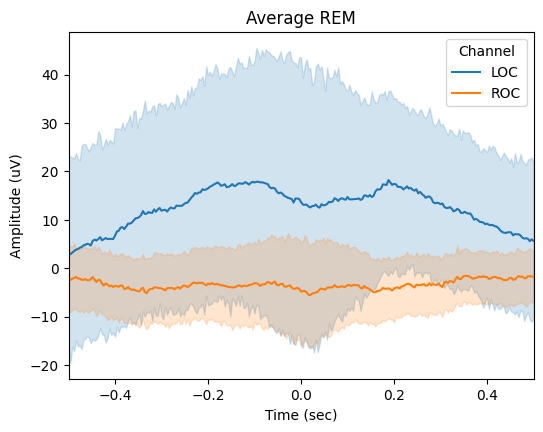

In [ ]:
rems_pipe.plot_average( 
    save=True, 
    center="Peak",
    time_before=0.5,
    time_after=0.5,
    filt=(None,None),
    mask=None,
    )